
# Analyse, projet 5 : réalisez une étude de marché 

Nous allons réaliser une étude sur nos données dans le but de trouver des pays qui serai profitable 


In [1]:

# Import des librairies
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing

#Import des fonctions perso
import fonction as f

#Chemin du dossier pour les images de graph
dossierImg = "./image_Graph/"


In [2]:

#Import du dataframe nettoyé
df_final = pd.read_csv("Data/set_etudeFinal.csv")


In [3]:
#Copy pour toujours avoir l'orignal en cas de besoin
df = df_final.copy()
df.head()


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %)
0,1,Arménie,3305.726017,122.980308,35.160,2977,0.269,7727.9,2.886
1,2,Afghanistan,2260.511826,80.206872,15.223,30552,2.438,1848.7,0.511
2,3,Albanie,3639.130747,145.509579,40.829,3173,0.348,10492.8,1.186
3,4,Algérie,3605.321287,122.401767,20.408,39208,1.887,13253.6,0.696
4,7,Angola,2647.511826,84.093955,21.880,21472,3.127,6188.0,3.135



Dans un premier temps, nous allons constituer des groupes de pays plutôt similaire. Cela nous permettra de vite choisir les groupes les plus prometteurs et d'avoir une idée du type de pays présent dans ces derniers.


In [4]:

df_etudeCluster = df[["country_code", "country","Disponibilité alimentaire (Kcal/personne/jour)",
                     "Disponibilité de protéines en quantité (g/personne/jour)",
                     "Proportion proteine animale (%)",
                     "Evolution de la population par rapport a l'an passée (en %)",
                     "Pib par habitant"]]
df_etudeCluster.head()


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),Evolution de la population par rapport a l'an passée (en %),Pib par habitant
0,1,Arménie,3305.726017,122.980308,35.160,0.269,7727.9
1,2,Afghanistan,2260.511826,80.206872,15.223,2.438,1848.7
2,3,Albanie,3639.130747,145.509579,40.829,0.348,10492.8
3,4,Algérie,3605.321287,122.401767,20.408,1.887,13253.6
4,7,Angola,2647.511826,84.093955,21.880,3.127,6188.0



Nous avons sélectionné les données par lesquelles nous classerons nos pays. Dans un premier temps, est ce que la population aurait les moyens de consommer nos produits ? Nous prendrons ici le PIB pour cela. Ensuite est ce que la consommation de viandes est présente dans les moeurs et coutume, est ce que la population mange de la viande. Dans la même direction est ce que les ressources du pays sont suffisantes pour produire sur place. Les proportions de protéine animale couvriront le premier point tandis que la disponibilité alimentaire et disponibilité de protéines nous éclaireront sur le second. Finalement, nous avons pris l'évolution des populations afin d'avoir une idée de la croissance démographique du pays, une forte croissance serai intéressante d'un point de vue plus lointaine avec une augmentation de nos clients potentiels.


In [5]:

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_etudeCluster[["Disponibilité alimentaire (Kcal/personne/jour)",
                     "Disponibilité de protéines en quantité (g/personne/jour)",
                     "Proportion proteine animale (%)",
                     "Evolution de la population par rapport a l'an passée (en %)",
                     "Pib par habitant"]]


# préparation des données pour l'ACP
X = data_pca.values

#les intitulés
names = df_etudeCluster['country'] 
features = data_pca.columns

# Réduction Centrage
std_scale = sk.preprocessing.StandardScaler().fit(X)

X_scaled = std_scale.transform(X)



## ACP de nos données

Nous effectuons ici une ACP pour avoir une bonne idée du lien de nos données.



### Éboulis des valeurs propres

Nous réalisons cet éboulis pour savoir combien d'axes nous étudierons dans notre ACP


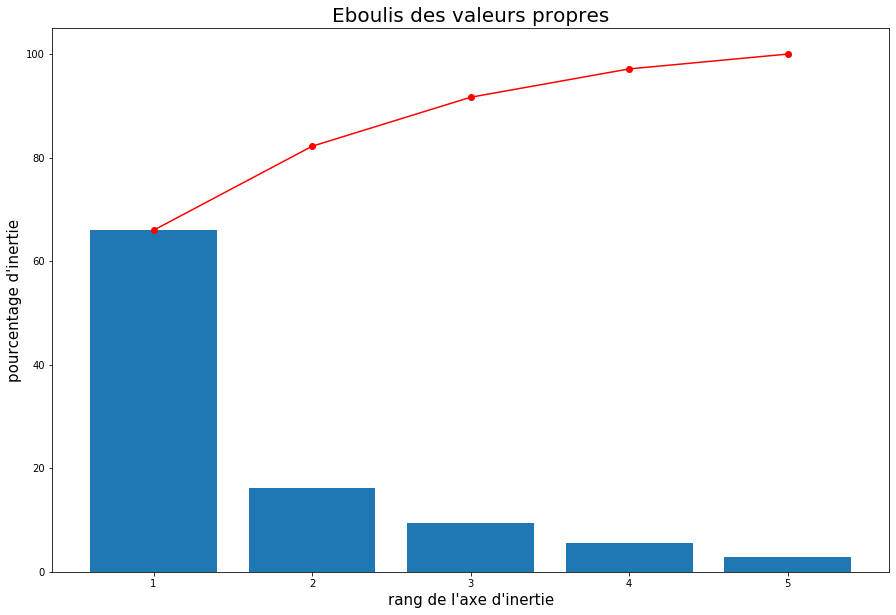

In [6]:

# choix du nombre de composantes à calculer
n_comp = 5

# Calcul des composantes principales
pca = sk.decomposition.PCA(n_components=n_comp)

pca.fit(X_scaled)


plt.figure(figsize=(15,10))
plt.xlabel("rang de l'axe d'inertie", fontsize=15)
plt.ylabel("pourcentage d'inertie", fontsize=15)
plt.title("Eboulis des valeurs propres",fontsize=20)

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

plt.savefig(dossierImg + "graph1.png")
plt.show()



Ici, on voit que les deux premiers axes représentent plus de 80 % d'inertie. On ne prendra que le premier plan. (les axes 1 et 2)


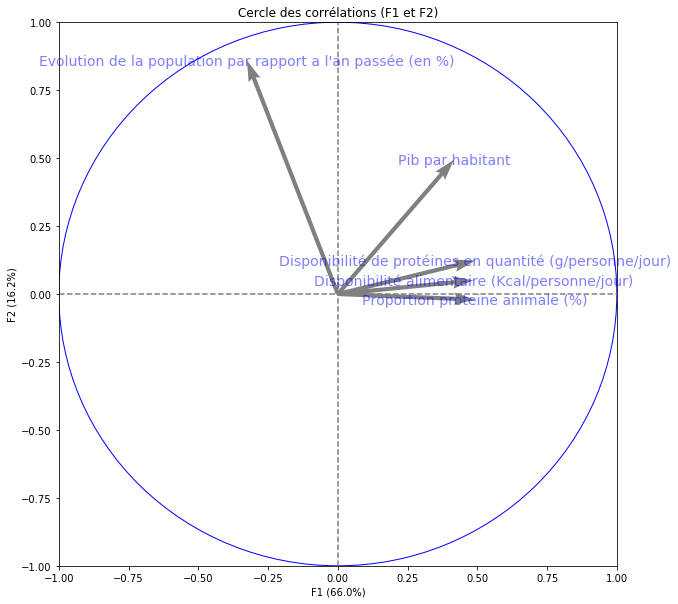

In [7]:

# préparation des données pour l'ACP
X = data_pca.values

#les intitulés
names = df.index 
features = data_pca.columns

pca = sk.decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
pcs = pca.components_

#Afichage du plan
f.display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


In [8]:
# Contribution a l'inertie des axes pour chaque variable.
f1 = pcs[0]
f2 = pcs[1]
f3 = pcs[2]

In [9]:

df_contribution = pd.DataFrame({"Disponibilité alimentaire (Kcal/personne/jour)" : [f1[0],f2[0],f3[0]],
                     "Disponibilité de protéines en quantité (g/personne/jour)": [f1[1],f2[1],f3[1]],
                     "Proportion proteine animale (%)": [f1[2],f2[2],f3[2]],
                     "Evolution de la population par rapport a l'an passée (en %)": [f1[3],f2[3],f3[3]],
                     "Pib par habitant": [f1[4],f2[4],f3[4]]})
df_contribution = df_contribution.reset_index()
df_contribution = df_contribution.rename({"index":'axes'}, axis=1)
df_contribution['axes'] = ['f1','f2',"f3"]
df_contribution.round(2)


,axes,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),Evolution de la population par rapport a l'an passée (en %),Pib par habitant
0,f1,0.49,0.49,0.49,-0.33,0.42
1,f2,0.05,0.12,-0.02,0.86,0.49
2,f3,-0.50,-0.48,0.28,-0.25,0.62



On peut voire que certaine variables contribue plus a l'inertie de certain axes que d'autre.



### Corrélation entre les variables.

Penchons-nous un peut plus sur la corrélation des différentes variables.


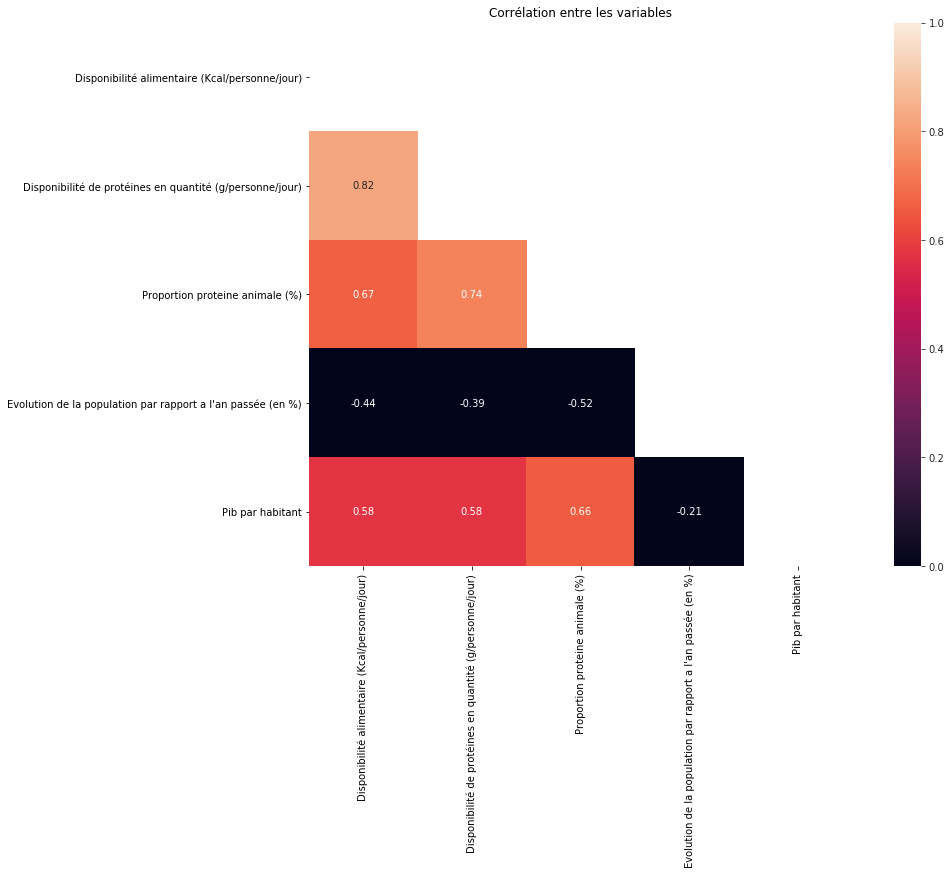

In [10]:

plt.figure(figsize=(15,10))
plt.title("Corrélation entre les variables")

corr = df_etudeCluster.drop(columns='country_code').corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = 0,vmax=1, square=True,annot=True)

plt.savefig(dossierImg + "graph2.png")
plt.show()


### Projection des individus sur le plan



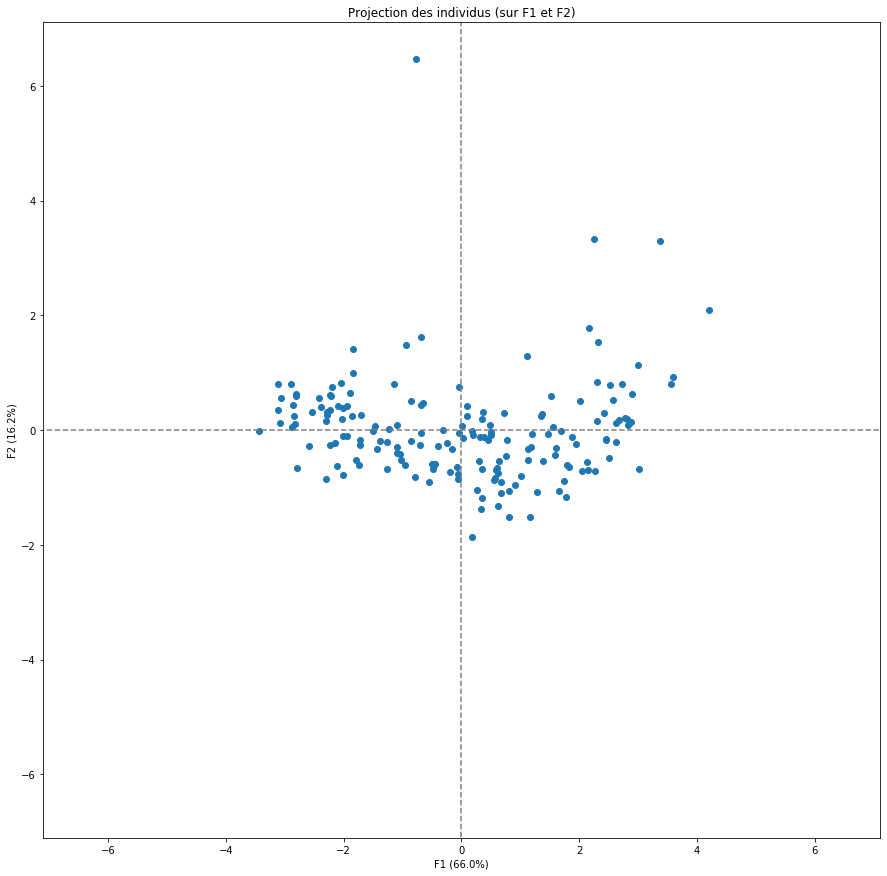

In [11]:
# Projection des individus

X_projected = pca.transform(X_scaled)

f.display_factorial_planes(X_projected, n_comp, pca, [(0,1)])



Déjà la disposition des pays sur ce plan nous apprend certaines choses. Plus un pays, ici un point, est positionner a droite, plus ce dernier a une grande disponibilité alimentaires et consommation de viande. Plus un pays sera proche du coin en haut a droite plus sont PIB est important.


## Clustering

Nous allons regrouper les individus similaires entre eux. Afin d'arriver à nos groupes de pays.



### Dendrogramme

Pour connaître le "bon" nombre de groupes à faire, nous allons nous reposer sur les résultats d'un dendrogramme que nous avons réalisé juste après.


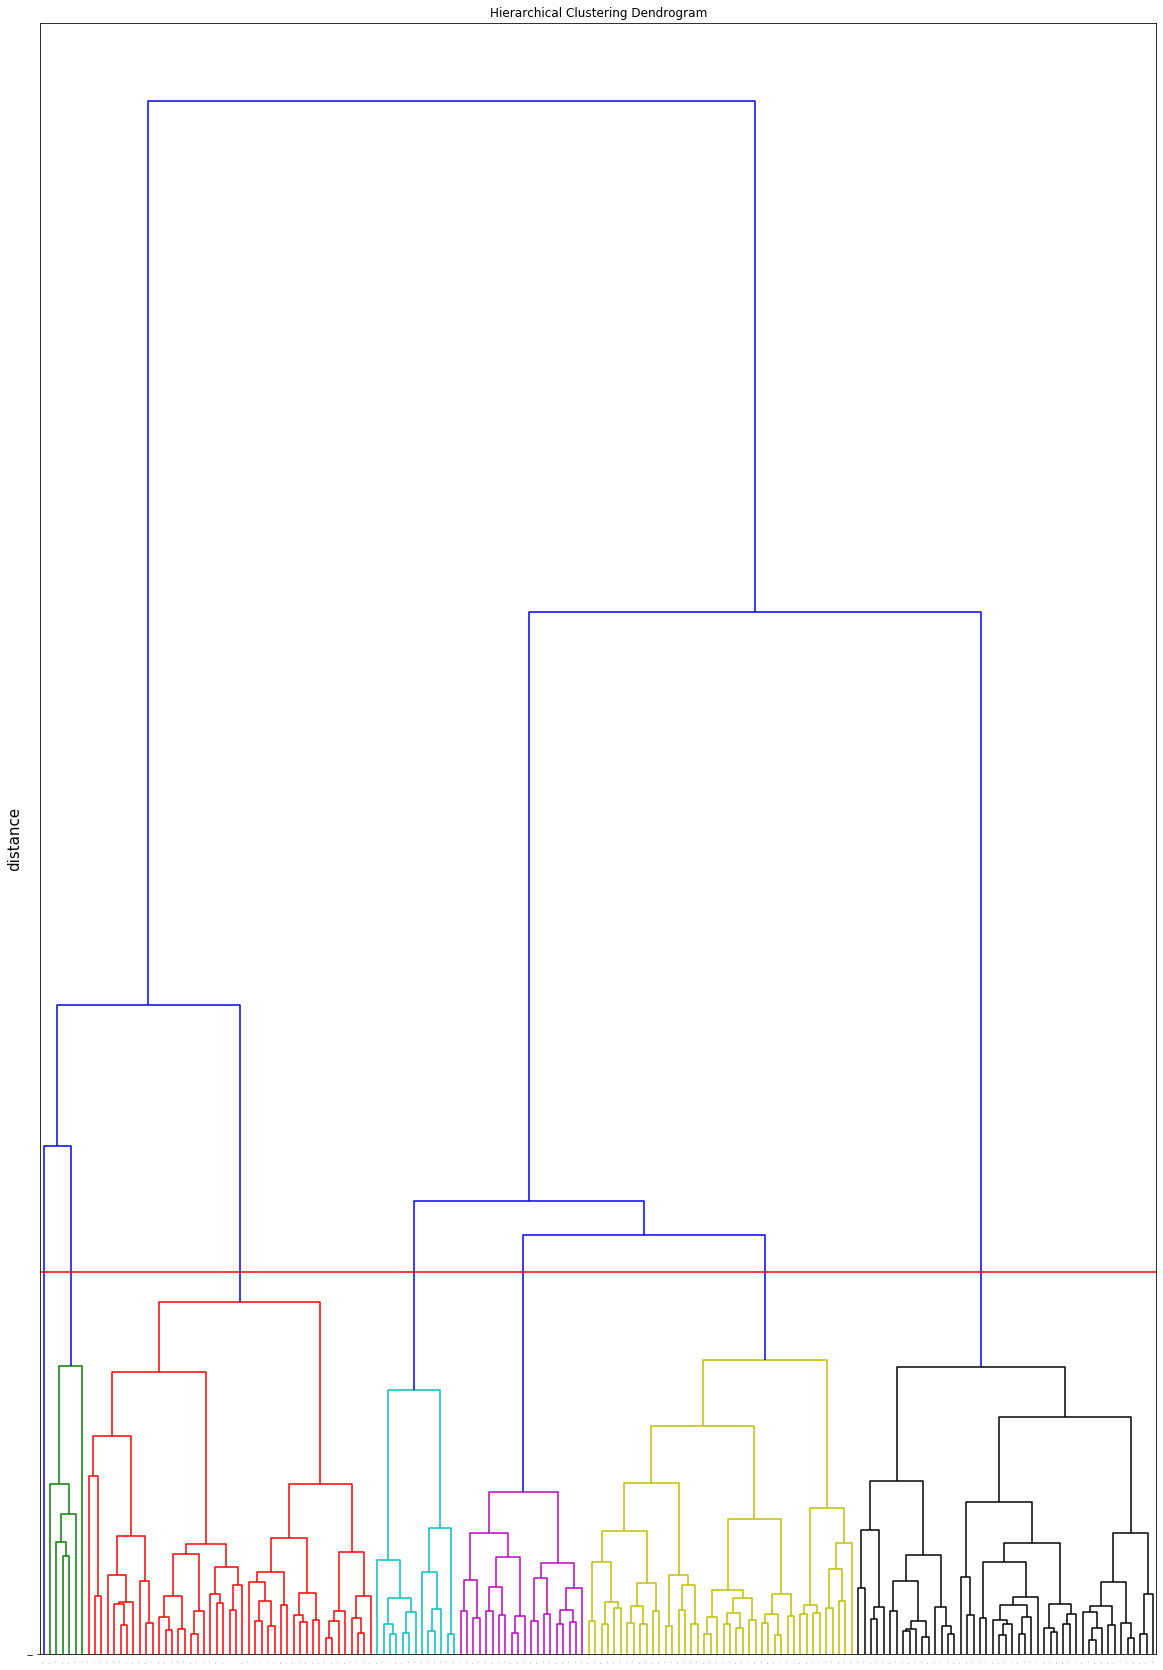

In [12]:

Z = linkage(X_scaled, 'ward', optimal_ordering=True)


# Affichage du dendrogramme

slope = 0
intercept = 6.5

plt.figure(figsize=(20,30))


dendrogram(
    Z,
    leaf_font_size=1,
    color_threshold=intercept
    )

#Ligne rouge 
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals,'r', '--')


plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance', fontsize=15)
plt.savefig(dossierImg + "graph3.png")

plt.show()


Nous avons décidé de garder 7 groupes. Nous avons séparé notre dendrogramme là où il n'était n'y trop précis n'y trop imprécis selon le sujet et le résultat que nous cherchions.



### Clusters des pays

Nous allons récupérer le cluster, les groupes de chaque pays.


<Figure size 1080x720 with 0 Axes>

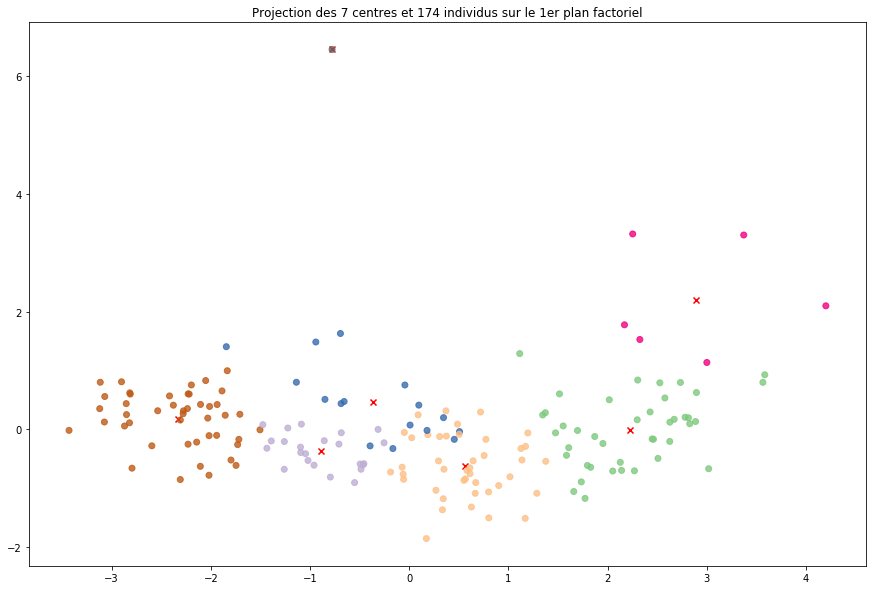

,country_code,country,Clusters
0,1,Arménie,2
1,2,Afghanistan,5
2,3,Albanie,0
3,4,Algérie,3
4,7,Angola,5
5,8,Antigua-et-Barbuda,2
6,9,Argentine,0
7,10,Australie,0
8,11,Autriche,0
9,12,Bahamas,2


In [13]:

#Nombre de clusters determiner plus haut
n_clust = 7

# Affichage des des individus et des centres de clusters sur le plan factoriel
plt.figure(figsize=(15,10))

kmCentroids = KMeans(n_clusters=n_clust, random_state=3)
kmCentroids.fit(X)
centroidsR = kmCentroids.cluster_centers_

Y = X_scaled
km = KMeans(n_clusters=n_clust, random_state=3)
km.fit(Y)


clusters = km.labels_


pca = decomposition.PCA(n_components=3).fit(Y)
Y_projected = pca.transform(Y)

centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.figure(figsize=(15,10))

#Centre des clusters sous forme d'une petite croix rouge.
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], marker="x",color='red')
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(np.float),cmap='Accent', alpha=.8)
plt.title("Projection des {} centres et {} individus sur le 1er plan factoriel".format(len(centroids),Y_projected.shape[0]))
plt.savefig(dossierImg + "graph4.png")

plt.show()


# Recuperation du clusters des pays
clusters = km.labels_
df_clusters = pd.DataFrame(index=[df_final.country_code,df_final.country])
df_clusters['Clusters'] = clusters
df_clusters = df_clusters.reset_index()
df_clusters.head(10)



Chaque pays fait donc maintenant partie d'un groupe d'autre pays.


In [14]:

#Ajout des clusters de chaque pays au tableau principal
df_final = df_final.merge(df_clusters, right_on=['country_code','country'], left_on=['country_code','country'])
df_final.head()


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters
0,1,Arménie,3305.726017,122.980308,35.160,2977,0.269,7727.9,2.886,2
1,2,Afghanistan,2260.511826,80.206872,15.223,30552,2.438,1848.7,0.511,5
2,3,Albanie,3639.130747,145.509579,40.829,3173,0.348,10492.8,1.186,0
3,4,Algérie,3605.321287,122.401767,20.408,39208,1.887,13253.6,0.696,3
4,7,Angola,2647.511826,84.093955,21.880,21472,3.127,6188.0,3.135,5


In [15]:

#Export des centroïdes pour les besoins du projet
df_centroids = pd.DataFrame(centroidsR)
df_centroids.to_csv('Data/set_centroids.csv',index=False)



## Étude des clusters

Maintenant que nous avons nos groupes de pays, nous allons les étudier pour en sélectionner un.


In [16]:

df_nbPaysCluster = pd.pivot_table(df_final, index="Clusters", aggfunc="count")
df_nbPaysCluster = df_nbPaysCluster.reset_index()
df_nbPaysCluster = df_nbPaysCluster.drop(columns=["Disponibilité alimentaire (Kcal/personne/jour)",
                          "Disponibilité de protéines en quantité (g/personne/jour)",
                          "Evolution de la population par rapport a l'an passée (en %)",
                          "Pib par habitant",
                          "Proportion proteine animale (%)",
                          "Variation du pib avec l'année precedente (en %)",
                          "country",
                          "populations"])
df_nbPaysCluster = df_nbPaysCluster.rename({"country_code":"Nombre pays clusters"},axis=1)
df_nbPaysCluster


,Clusters,Nombre pays clusters
0,0,41
1,1,23
2,2,42
3,3,16
4,4,6
5,5,45
6,6,1



Différentes moyenne des clusters


In [17]:

df_selectionClusters = pd.pivot_table(df_final,index='Clusters',aggfunc='mean')
df_selectionClusters = df_selectionClusters.round(3)
df_selectionClusters = df_selectionClusters.drop(columns='country_code')


In [18]:

df_selectionClusters.sort_values(by ='Pib par habitant', ascending=False)


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Proportion proteine animale (%),Variation du pib avec l'année precedente (en %),populations
Clusters,,,,,,,
4,3658.776,134.457,1.730,83952.467,43.344,0.908,3212.000
6,3556.428,118.692,9.596,41924.800,38.503,-2.569,3632.000
0,3705.314,131.810,0.491,33322.512,47.305,1.159,30606.415
2,3185.174,113.401,0.477,15820.365,38.355,2.359,49974.524
1,2850.800,95.798,1.298,8911.913,29.596,3.789,43647.522
3,3295.332,117.478,2.225,8652.969,24.433,1.291,21124.188
5,2517.290,86.697,2.355,4130.980,15.528,1.942,50638.867



Penchons nous un peu plus en détails sur le cluster n°0. J'ai conservé celui-ci pour plusieurs raisons. Dans un premier temps, une des populations importante couplée à une augmentation du PIB par habitant mon permis de le faire sortir du lot. Les consommations de protéine la plus élevée et les différentes disponibilités alimentaires mon permis de confirmer ma sélection.

Un bon PIB et une population plutôt importante nous permettront de trouver une clientèle de base assez rapidement, les perspectives d'évolution du pays autant par sont PIB que par ca population nous permettra de cibler un plus grand nombre de clients dans un future assez proche.



### Étude approfondis sur le cluster 0

Pour choisir les pays avec plus de précision, nous allons rajouter quelque variable ainsi nous pourrons choisir un peu plus précisément nos pays.


In [19]:

df_retenu = df_final[df_final.Clusters == 0].round(3)
df_retenu = df_retenu.reset_index()
df_retenu = df_retenu.drop('index',axis=1)

df_retenu.sort_values(by = ['populations'], ascending=False).head(20)


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters
38,231,États-Unis d'Amérique,3959.619,122.832,56.801,320051,0.802,51003.7,0.957,0
30,185,Fédération de Russie,3776.428,132.072,42.537,142834,-0.235,25551.1,1.569,0
11,79,Allemagne,3884.726,122.118,50.353,82727,-0.088,42914.5,0.216,0
36,223,Turquie,4089.726,130.067,27.909,74933,1.265,21650.8,6.749,0
10,68,France,3863.726,134.885,51.407,64291,0.554,37350.3,0.060,0
37,229,Royaume-Uni,3772.024,132.402,45.334,63384,0.562,37398.8,1.371,0
17,106,Italie,3925.024,134.095,43.425,60990,0.172,34219.8,-2.861,0
19,117,République de Corée,3575.917,121.725,37.897,49263,0.531,32548.7,2.429,0
33,203,Espagne,3450.619,124.268,52.419,46927,0.368,30678.9,-1.383,0
1,9,Argentine,3642.428,130.643,51.231,41446,0.874,19482.2,1.338,0



Lors d'un premier tri, nous avons retenu ces pays-ci.


In [20]:

df_retenu.loc[df_retenu.country.isin(["États-Unis d'Amérique","France","Fédération de Russie","Canada","Australie"])]


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters
2,10,Australie,3729.131,133.084,53.868,23343,1.271,43118.1,0.850,0
5,33,Canada,3811.321,118.472,46.171,35182,0.987,42339.4,1.304,0
10,68,France,3863.726,134.885,51.407,64291,0.554,37350.3,0.060,0
30,185,Fédération de Russie,3776.428,132.072,42.537,142834,-0.235,25551.1,1.569,0
38,231,États-Unis d'Amérique,3959.619,122.832,56.801,320051,0.802,51003.7,0.957,0



Nous avons donc sélectionné ces 3 pays-ci, comme il nous l'était demander dans l'énnoncer.


In [21]:

df_retenu.loc[df_retenu.country.isin(["États-Unis d'Amérique","France","Fédération de Russie"])]


,country_code,country,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Proportion proteine animale (%),populations,Evolution de la population par rapport a l'an passée (en %),Pib par habitant,Variation du pib avec l'année precedente (en %),Clusters
10,68,France,3863.726,134.885,51.407,64291,0.554,37350.3,0.060,0
30,185,Fédération de Russie,3776.428,132.072,42.537,142834,-0.235,25551.1,1.569,0
38,231,États-Unis d'Amérique,3959.619,122.832,56.801,320051,0.802,51003.7,0.957,0



### Tests statistique


Parmi les quatre variable ' imposé ' nous allons chercher une loi normale

Nous allons regarder, les variables suivantes :

- Différence de population

- Proportion de protéine d'origine animale

- Disponibilité alimentaire en Kcal

- Disponibilité alimentaire en protéine.


In [22]:

a1 = data_pca['Disponibilité alimentaire (Kcal/personne/jour)']
b1 = data_pca['Disponibilité de protéines en quantité (g/personne/jour)']
c1 = data_pca['Proportion proteine animale (%)']
d1 = data_pca['Evolution de la population par rapport a l\'an passée (en %)']

def normaltest_perso(a_tester):   
    k2, p = st.normaltest(a_tester)
    alpha = 0.01
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("L'hypothèse nulle peut être rejetée.")
    else:
         print("L'hypothèse nulle ne peut pas être rejetée")
        


Nous allons utiliser le test *normaltest*, nous prendrons ici un risque alpha à 1 %,

Notre hypothèse nulle est ici : " la distribution de la variable suit une distribution normale ".


In [23]:

normaltest_perso(a1)


p = 2.21113e-06
L'hypothèse nulle peut être rejetée.



Le risque alpha est plus important que la p_value donc notre hypothèse nulle est rejeter


In [24]:

normaltest_perso(b1)


p = 0.551344
L'hypothèse nulle ne peut pas être rejetée



Ici la p_value est plus haute que le risque, donc nous pouvons garder l'hypothèse h0


In [25]:

normaltest_perso(c1)


p = 6.12001e-09
L'hypothèse nulle peut être rejetée.



Le risque alpha est plus important que la p_value donc notre hypothèse nulle est rejeter


In [26]:

normaltest_perso(d1)


p = 2.5918e-21
L'hypothèse nulle peut être rejetée.



Le risque alpha est plus important que la p_value donc notre hypothèse nulle est rejeter



### Test inter clusters

Ici, nous voulons faire un test de comparaison entre la même variable de deux clusters.
Nous allons donc faire une comparaison gaussienne.


h0 = les deux distributions indépendantes ont la même valeur moyenne

Risque alpha 1 %.


In [27]:

st.ttest_ind(df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==1],
             df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==3],
             equal_var = False)


Ttest_indResult(statistic=-9.455605936602888, pvalue=2.7392606527538708e-11)


p_value est inférieur aux risques, l'hypothèse nulle h0 est rejeter


In [28]:

st.ttest_ind(df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==1],
             df_final["Disponibilité de protéines en quantité (g/personne/jour)"][df_final['Clusters']==3],
             equal_var = True)


Ttest_indResult(statistic=-9.111480684321135, pvalue=5.441353662235324e-11)

p_value est inférieur aux risques, l'hypothèse nulle h0 est rejeter

## Conclusion

A faire